# Exercises: Confidence Intervals - Answer Key
By Christopher Fenaroli and Delaney Mackenzie

## Lecture Link:
https://www.quantopian.com/lectures/confidence-intervals

### IMPORTANT NOTE: 
This lecture corresponds to the Confidence Intervals lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

When you feel comfortable with the topics presented here, see if you can create an algorithm that qualifies for the Quantopian Contest. Participants are evaluated on their ability to produce risk-constrained alpha and the top 10 contest participants are awarded cash prizes on a daily basis.

https://www.quantopian.com/contest

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

----

## Key Concepts

In [1]:
def generate_autocorrelated_data(theta, mu, sigma, N):
    X = np.zeros((N, 1))
    for t in range(1, N):
        X[t] = theta * X[t-1] + np.random.normal(mu, sigma)
    return X

def newey_west_SE(data):
    ind = range(0, len(data))
    ind = sm.add_constant(ind)
    model = regression.linear_model.OLS(data, ind).fit(cov_type='HAC',cov_kwds={'maxlags':1})
    return model.bse[0]

def newey_west_matrix(data):
    ind = range(0, len(data))
    ind = sm.add_constant(ind)
    model = regression.linear_model.OLS(data, ind).fit()
    return sw.cov_hac(model)

In [2]:
# Useful Libraries
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import jarque_bera
import statsmodels.stats.sandwich_covariance as sw
from statsmodels import regression
import statsmodels.api as sm

#### Data

In [3]:
np.random.seed(11)
POPULATION_MU = 105
POPULATION_SIGMA = 20
sample_size = 50

# Exercise 1: Determining Confidence Intervals

## a. Mean

Determine the mean of the following artificial data in `sample`.

In [4]:
sample = np.random.normal(POPULATION_MU, POPULATION_SIGMA, sample_size)

#Your code goes here

Mean = np.mean(sample)

print "Mean:", Mean

Mean: 103.223647005


## b. Standard Deviation

Determine standard deviation of the sample.

In [5]:
#Your code goes here

SD = np.std(sample)

print "Standard Deviation:", SD

Standard Deviation: 18.0645730239


## c. Standard Error

Using the standard deviation and `sample_size`, determine the standard error for the sample.

In [6]:
#Your code goes here

SE = SD / np.sqrt(sample_size)

print "Standard Error:", SE

Standard Error: 2.55471641688


## d. Confidence Intervals

Using the standard error and mean, determine 95% `(Z = 1.96)`, 90% `(Z = 1.64)`, and 80% `(Z = 1.28)` confidence intervals for the sample. 

In [7]:
#Your code goes here

print "95% Confidence Interval:", (-1.96 * SE + Mean, 1.96 * SE + Mean)
print "90% Confidence Interval:", (-1.64 * SE + Mean, 1.64 * SE + Mean)
print "80% Confidence Interval:", (-1.28 * SE + Mean, 1.28 * SE + Mean)

95% Confidence Interval: (98.216402827473189, 108.23089118165043)
90% Confidence Interval: (99.03391208087541, 107.41338192824821)
80% Confidence Interval: (99.953609990952913, 106.49368401817071)


----

# Exercise 2: Interpreting Confidence Intervals

Assuming our interval was correctly calculated and that the underlying data was independent, if we take many samples and make many 95% confidence intervals, the intervals will contain the true mean 95% of the time. Run 1000 samples and measure how many of their confidence intervals actually contain the true mean.

In [8]:
n = 1000
correct = 0
samples = [np.random.normal(loc=POPULATION_MU, scale=POPULATION_SIGMA, size=sample_size) for i in range(n)]

#Your code goes here

for i in range(n):
    sample_mean = np.mean(samples[i])
    sample_SE = stats.sem(samples[i])
    if ((POPULATION_MU >= -1.96 * sample_SE + sample_mean) and (POPULATION_MU <= 1.96 * sample_SE + sample_mean)):
        correct += 1;

print "Expected Result:", .95 * 1000
print "Actual Result", correct

Expected Result: 950.0
Actual Result 932


----

# Exercise 3: Central Limit Theorem

## a. Plotting Sample Means - Normal

Assuming our samples are independent, the distribution of the sample means should be normally distributed, regardless of the underlying distribution. 

Draw 500 samples of size `sample_size` from the same normal distribution from question 1, plot the means of each of the samples, and check to see if the distribution of the sample means is normal using the `jarque_bera` function (see [here](https://www.quantopian.com/lectures/statistical-moments) more information on the Jarque-Bera test)

0.639560006167
The distribution of sample means is likely normal.


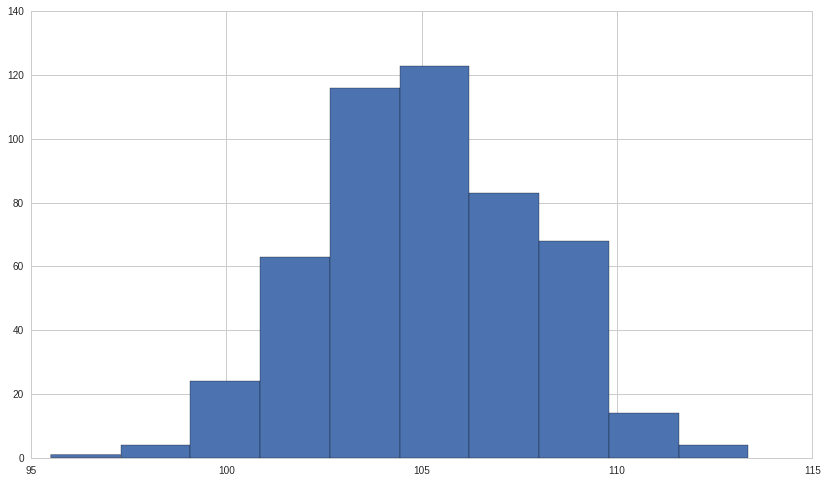

In [9]:
n = 500
normal_samples = [np.mean(np.random.normal(loc=POPULATION_MU, scale=POPULATION_SIGMA, size=sample_size)) for i in range(n)]

#Your code goes here

plt.hist(normal_samples, 10)

_, pvalue, _, _ = jarque_bera(normal_samples)

print pvalue
if pvalue > 0.05:
    print 'The distribution of sample means is likely normal.'
else:
    print 'The distribution of sample means is likely not normal.'

## b. Plotting Sample Means - Exponential

Draw 500 samples of size `sample_size` from a new exponential distribution, plot the means of each of the samples, and check to see if the distribution of the sample means is normal.

0.306129798551
The distribution of sample means is likely normal, despite the underlying distribution being non-normal (exponential).


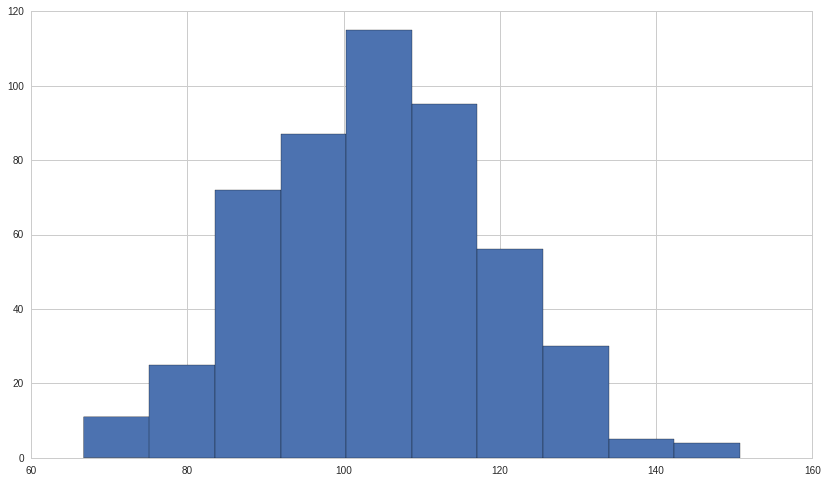

In [10]:
n = 500
expo_samples = [np.mean(np.random.exponential(POPULATION_MU, sample_size)) for i in range(n)]

#Your code goes here

plt.hist(expo_samples, 10)

_, pvalue, _, _ = jarque_bera(expo_samples)

print pvalue
if pvalue > 0.05:
    print 'The distribution of sample means is likely normal, despite the underlying distribution being non-normal (exponential).'
else:
    print 'The distribution of sample means is likely not normal.'

## c.i Plotting Sample Means - Autocorrelated

Draw 500 samples of size `sample_size` from a new autocorrelated (dependent) distribution, plot the means of each of the samples, and check to see if the distribution of the sample means is normal.

0.440090741806
The distribution of sample means is likely normal, despite an autocorrelated underlying distribution.


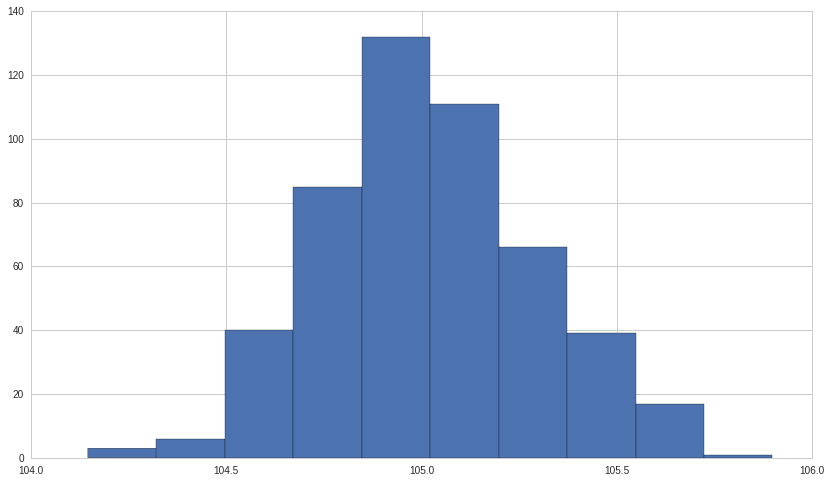

In [11]:
n = 500
autocorrelated_samples = [(generate_autocorrelated_data(0.5, 0, 1, sample_size) + POPULATION_MU) for i in range(n)]
autocorrelated_means = [np.mean(autocorrelated_samples[i]) for i in range(n)]

#Your code goes here

plt.hist(autocorrelated_means, 10)

_, pvalue, _, _ = jarque_bera(autocorrelated_means)

print pvalue
if pvalue > 0.05:
    print 'The distribution of sample means is likely normal, despite an autocorrelated underlying distribution.'
else:
    print 'The distribution of sample means is likely not normal.'

## c.ii Plotting Sample Standard Deviations - Autocorrelated

Draw 500 samples of size `sample_size` from the same autocorrelated distribution, plot the standard deviations of each of the samples, and check to see if the distribution of the sample standard deviations is normal.

0.00411075021602
The distribution of sample standard deviations is likely not normal, due to the autocorrelated underlying distribution and the different assumptions for the CLT for means and for standard deviations.


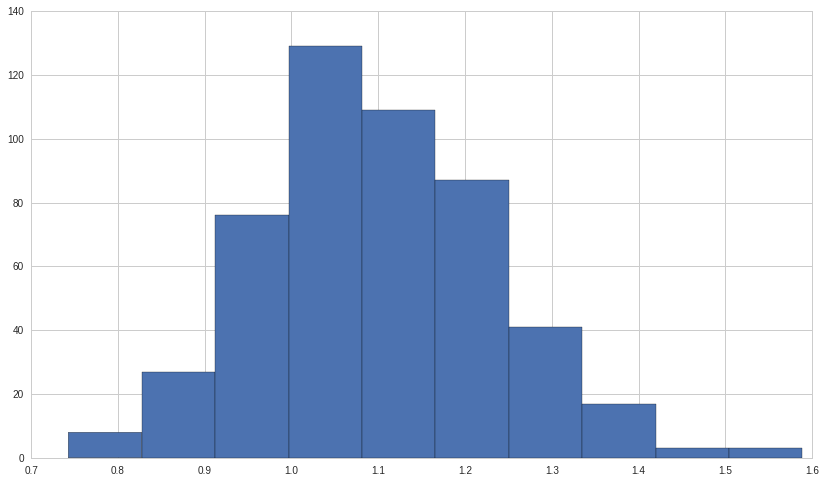

In [12]:
n = 500
autocorrelated_samples = [(generate_autocorrelated_data(0.5, 0, 1, sample_size) + POPULATION_MU) for i in range(n)]
autocorrelated_stds = [np.std(autocorrelated_samples[i]) for i in range(n)]

#Your code goes here

plt.hist(autocorrelated_stds, 10)

_, pvalue, _, _ = jarque_bera(autocorrelated_stds)

print pvalue
if pvalue > 0.05:
    print 'The distribution of sample standard deviations is likely normal.'
else:
    print 'The distribution of sample standard deviations is likely not normal, due to the autocorrelated underlying distribution and the different assumptions for the CLT for means and for standard deviations.'
    

----

# Exercise 4: Small Sample Sizes

## a. Error Due to Small Sample Size

Run 100 samples of size `small_size` and measure how many of their 95% confidence intervals actually contain the true mean.

In [13]:
n = 100
small_size = 3
correct = 0
samples = [np.random.normal(loc=POPULATION_MU, scale=POPULATION_SIGMA, size=small_size) for i in range(n)]
    
#Your code goes here
    
for i in range(n):
    sample_mean = np.mean(samples[i])
    sample_SE = stats.sem(samples[i])
    if ((POPULATION_MU >= -1.96 * sample_SE + sample_mean) and (POPULATION_MU <= 1.96 * sample_SE + sample_mean)):
        correct += 1

print "Expected Result:", .95 * n
print "Actual Result:", correct
print "Due to the small sample size, the actual number of confidence intervals containing the population mean is much lower than what we would expect given a correctly calibrated interval."


Expected Result: 95.0
Actual Result 74
Due to the small sample size, the actual number of confidence intervals containing the population mean is much lower than what we would expect given a correctly calibrated interval.


## b. T-distribution Correction

Run 100 samples of size `small_size`, this time accouting for the small sample size using a t-distribution, and measure how many of their 95% confidence intervals actually contain the true mean.

In [14]:
n = 100
small_size = 5
correct = 0
samples = [np.random.normal(loc=POPULATION_MU, scale=POPULATION_SIGMA, size=small_size) for i in range(n)]

#Your code goes here
    
for i in range(n):
    sample_mean = np.mean(samples[i])
    sample_SE = stats.sem(samples[i])
    h = sample_SE * stats.t.ppf((1+0.95) / 2, len(samples[i])-1)
    if ((POPULATION_MU >= sample_mean - h) and (POPULATION_MU <= sample_mean + h)):
        correct += 1

print "Expected Result:", .95 * n
print "Actual Result:", correct
print "After using the t-distribution to correct for the smaller sample size, the actual number of confidence intervals containing the population mean is about what we expected."


Expected Result: 95.0
Actual Result 95
After using the t-distribution to correct for the smaller sample size, the actual number of confidence intervals containing the population mean is about what we expected.


----

# Exercise 5: Dependence

## a. Error due to Dependence

Run 100 samples of the following autocorrelated distribution and measure how many of their 95% confidence intervals actually contain the true mean. (Use the helper function `generate_autocorrelated_data(theta, noise_mu, noise_sigma, sample_size)` to generate the samples)

In [15]:
n = 100
correct = 0
theta = 0.5
noise_mu = 0
noise_sigma = 1

#Your code goes here

for i in range(n):
    X = generate_autocorrelated_data(theta, noise_mu, noise_sigma, sample_size) + POPULATION_MU
    sample_mean = np.mean(X)
    sample_SE = np.std(X) / np.sqrt(sample_size)
    if ((POPULATION_MU >= -1.96 * sample_SE + sample_mean) and (POPULATION_MU <= 1.96 * sample_SE + sample_mean)):
        correct += 1
    

print "Expected Result:", .95 * n
print "Actual Result:", correct
print "Because the underlying data was autocorrelated, the actual number of confidence intervals containing the population mean is much lower than what we expected."


Expected Result: 95.0
Actual Result 71
Because the underlying data was autocorrelated, the actual number of confidence intervals containing the population mean is much lower than what we expected.


## b. T-distribution Correction

Run 100 samples from the autocorrelated distribution, this time attempting to account for the autocorrelation using a t-distribution, and measure how many of their 95% confidence intervals actually contain the true mean to see if the correction works.

In [16]:
n = 100
correct = 0

#Your code goes here

for i in range(n):
    X = generate_autocorrelated_data(theta, noise_mu, noise_sigma, sample_size) + POPULATION_MU
    sample_mean = np.mean(X)
    sample_SE = np.std(X) / np.sqrt(sample_size)
    h = sample_SE * stats.t.ppf((1+0.95) / 2, len(X)-1)
    if ((POPULATION_MU >= sample_mean - h) and (POPULATION_MU <= sample_mean + h)):
        correct += 1
    

print "Expected Result:", .95 * n
print "Actual Result:", correct
print "We did not see a significant improvement in the actual number of confidence intervals containing the population mean. This is because a t-distribution only corrects for small sample sizes, not autocorrelation."


Expected Result: 95.0
Actual Result 73
We did not see a significant improvement in the actual number of confidence intervals containing the population mean. This is because a t-distribution only corrects for small sample sizes, not autocorrelation.


## c. Newey-West Matrix

Use the `newey_west_matrix` helper function to compute an adjusted (robust) covariance matrix for a single sample of the autocorrelated data. 

In [17]:
X = generate_autocorrelated_data(theta, noise_mu, noise_sigma, sample_size) + POPULATION_MU

#Your code goes here

print newey_west_matrix(X)

[[ 0.33326676 -0.00994368]
 [-0.00994368  0.00036869]]


## d. Newey-West Correction

Run 100 samples of the following autocorrelated distribution, this time accounting for the autocorrelation by using a Newey-West correction on the standard error, and measure how many of their 95% confidence intervals actually contain the true mean to see if the correction works. (Use the helper function `newey_west_SE` to find the corrected standard error)

In [18]:
n = 100
correct = 0

#Your code goes here

for i in range(n):
    X = generate_autocorrelated_data(theta, noise_mu, noise_sigma, sample_size) + POPULATION_MU
    sample_mean = np.mean(X)
    sample_SE = newey_west_SE(X)
    if ((POPULATION_MU >= -1.96 * sample_SE + sample_mean) and (POPULATION_MU <= 1.96 * sample_SE + sample_mean)):
        correct += 1

print "New Standard Error:", sample_SE
print "Expected Result:", .95 * n
print "Actual Result:", correct
print "After accounting for autocorrelation by finding a Newey-West standard error, the actual number of confidence intervals containing the population mean is about what we expected."


New Standard Error: 0.426986022024
Expected Result: 95.0
Actual Result 97
After accounting for autocorrelation by finding a Newey-West standard error, the actual number of confidence intervals containing the population mean is about what we expected.


---

Congratulations on completing the Confidence Intervals exercises!

As you learn more about writing trading models and the Quantopian platform, enter the daily [Quantopian Contest](https://www.quantopian.com/contest). Your strategy will be evaluated for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solic
itation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*